In [54]:
# Useful imports and setup
import sys
import os
# Necessary to import code from ../scripts/
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/scripts")
    
import warnings
warnings.filterwarnings("ignore")
    
import random
random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
import operator
from itertools import islice
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

%load_ext autoreload
%autoreload 2

results_path = '../results/'
clustering_method = 'spectral_clustering'
labels_path = '../labels/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union


def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))

### Jaccard Similarity

In [94]:
df_importance_shap = pd.read_csv(results_path+'shap/'+clustering_method+'/features_importance.csv')
df_importance_lime = pd.read_csv(results_path+'lime/'+clustering_method+'/features_importance.csv')

In [95]:
scaler = MinMaxScaler()
cols = df_importance_shap.columns
df_importance_shap = pd.DataFrame(scaler.fit_transform(df_importance_shap.T).T, columns=cols)

In [96]:
scaler = MinMaxScaler()
cols = df_importance_lime.columns
df_importance_lime = pd.DataFrame(scaler.fit_transform(df_importance_lime.T).T, columns=cols)

In [97]:
zero_data = np.zeros(shape=(len(df_importance_shap)+len(df_importance_shap), len(df_importance_shap)+len(df_importance_shap)))
cols = ['Lime_'+str(i) for i in range(len(df_importance_lime))]
cols.extend(['Shap_'+str(i) for i in range(len(df_importance_shap))])
d = pd.DataFrame(zero_data, columns=cols)

data = []
for i in range(len(df_importance_lime)):
    data.append(list({k: v for k, v in df_importance_lime.iloc[i].to_dict().items() if (not isinstance(v, float)) or (not math.isnan(v))}.keys()))

for i in range(len(df_importance_shap)):
    data.append(take(10, dict(sorted(df_importance_shap.iloc[i].to_dict().items(), key=operator.itemgetter(1),reverse=True))))

count = 0
for i in range(len(d)):
    for k,j in enumerate(d.columns):
        d[j][i] = jaccard(data[i], data[k])

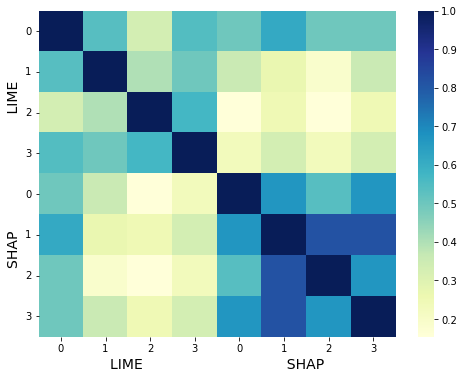

In [98]:
fig, ax = plt.subplots(figsize=(8, 6),facecolor='white')
g = sns.heatmap(d, fmt=".2f",ax=ax, cmap="YlGnBu")
l=list(np.arange(1,6+1))
g.set(xlabel='LIME                                SHAP', ylabel='SHAP                          LIME')
g.xaxis.get_label().set_fontsize(14)
g.yaxis.get_label().set_fontsize(14)
g.set_xticklabels(['0', '1', '2', '3', '0', '1', '2', '3'],rotation=0)
g.set_yticklabels(['0', '1', '2', '3', '0', '1', '2', '3'],rotation=0)
plt.show()

In [99]:
df_importance_interC3 = pd.read_csv(results_path+'inter-c3/'+clustering_method+'/features_importance.csv')

In [100]:
best10_shap_cluster3 = take(10, dict(sorted(df_importance_shap.iloc[3].to_dict().items(), key=operator.itemgetter(1),reverse=True)))
best10_lime_cluster3 = list({k: v for k, v in df_importance_lime.iloc[3].to_dict().items() if (not isinstance(v, float)) or (not math.isnan(v))}.keys())
best10_interc3_cluster0 = take(10, dict(sorted(df_importance_interC3.iloc[0].to_dict().items(), key=operator.itemgetter(1),reverse=True)))

In [101]:
zero_data = np.zeros((3, 3))
cols = ['LIME', 'SHAP', 'InterC3']
d = pd.DataFrame(zero_data, columns=cols)

data = [best10_shap_cluster3, best10_lime_cluster3, best10_interc3_cluster0]

count = 0
for i in range(len(d)):
    for k,j in enumerate(d.columns):
        d[j][i] = jaccard(data[i], data[k])

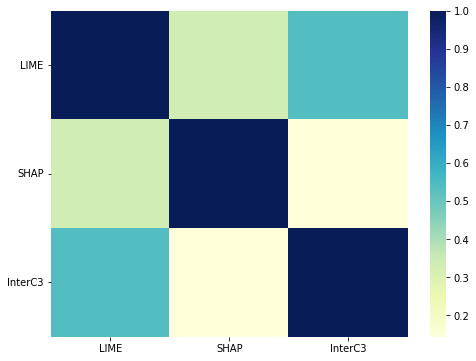

In [102]:
fig, ax = plt.subplots(figsize=(8, 6),facecolor='white')
g = sns.heatmap(d, fmt=".2f",ax=ax, cmap="YlGnBu")
l=list(np.arange(1,6+1))
# g.set(xlabel='LIME                                SHAP', ylabel='SHAP                          LIME')
g.xaxis.get_label().set_fontsize(14)
g.yaxis.get_label().set_fontsize(14)
# g.set_xticklabels(['0', '1', '0', '1'],rotation=0)
g.set_yticklabels(['LIME', 'SHAP', 'InterC3'],rotation=0)
plt.show()

### Spearman's Rank Correlation

In [103]:
df_importance = pd.concat([df_importance_shap, df_importance_lime])

In [104]:
df_importance = df_importance.fillna(0)

In [105]:
zero_data = np.zeros(shape=(len(df_importance_shap)+len(df_importance_shap), len(df_importance_shap)+len(df_importance_shap)))
cols = ['Lime_'+str(i) for i in range(len(df_importance_lime))]
cols.extend(['Shap_'+str(i) for i in range(len(df_importance_shap))])
d = pd.DataFrame(zero_data, columns=cols)

data = []
for i in range(len(df_importance_lime)):
    data.append(df_importance.iloc[i+len(df_importance_shap)])

for i in range(len(df_importance_shap)):
    data.append(df_importance.iloc[i])

count = 0
for i in range(len(d)):
    for k,j in enumerate(d.columns):
        d[j][i] = stats.spearmanr(data[i], data[k])[0]

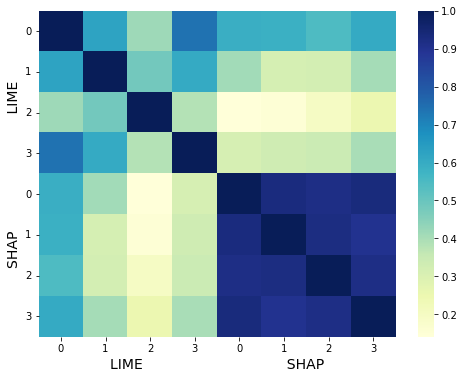

In [106]:
fig, ax = plt.subplots(figsize=(8, 6),facecolor='white')
g = sns.heatmap(d, fmt=".2f",ax=ax, cmap="YlGnBu")
l=list(np.arange(1,6+1))
g.set(xlabel='LIME                                SHAP', ylabel='SHAP                          LIME')
g.xaxis.get_label().set_fontsize(14)
g.yaxis.get_label().set_fontsize(14)
g.set_xticklabels(['0', '1', '2', '3', '0', '1', '2', '3'],rotation=0)
g.set_yticklabels(['0', '1', '2', '3', '0', '1', '2', '3'],rotation=0)
plt.show()

In [107]:
df_importance = pd.concat([df_importance, df_importance_interC3])

In [112]:
df_importance = df_importance.fillna(0)

In [114]:
zero_data = np.zeros((3, 3))
cols = ['LIME', 'SHAP', 'InterC3']

d = pd.DataFrame(zero_data, columns=cols)

data = [df_importance.iloc[3+len(df_importance_shap)], df_importance.iloc[3], df_importance.iloc[2*len(df_importance_shap)]]

count = 0
for i in range(len(d)):
    for k,j in enumerate(d.columns):
        d[j][i] = stats.spearmanr(data[i], data[k])[0]

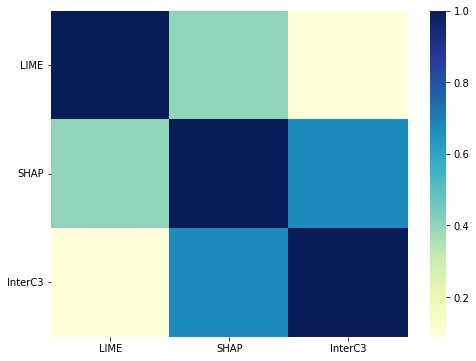

In [115]:
fig, ax = plt.subplots(figsize=(8, 6),facecolor='white')
g = sns.heatmap(d, fmt=".2f",ax=ax, cmap="YlGnBu")
l=list(np.arange(1,6+1))
# g.set(xlabel='LIME                                SHAP', ylabel='SHAP                          LIME')
g.xaxis.get_label().set_fontsize(14)
g.yaxis.get_label().set_fontsize(14)
# g.set_xticklabels(['0', '1', '0', '1'],rotation=0)
g.set_yticklabels(['LIME', 'SHAP', 'InterC3'],rotation=0)
plt.show()

In [55]:
labels_cluster_path = labels_path + 'spectral_clustering/'
labels_masked = np.loadtxt(labels_cluster_path+'masked_hard_fail_perc_0.6_gamma_0.6.txt', dtype=int)
labels_baseline = np.loadtxt(labels_cluster_path+'baseline_cluster_labels_perc_0.6_gamma_0.6.txt', dtype=int)

In [122]:
similarity = {}
for i in range(np.max(labels_masked)+1):
    masked = np.where(labels_masked == i)[0]
    max_similarity = 0
    idx_sim = -1
    for j in range(np.max(labels_baseline)+1):
        sim = jaccard(masked, np.where(labels_baseline == j)[0])
        if sim > max_similarity:
            max_similarity = sim
            idx_sim = j
    similarity[i] = idx_sim

In [123]:
similarity

{0: 3, 1: 2, 2: 2}

In [124]:
best10_shap_cluster3 

['competency_anticipation',
 'competency_strength',
 'total_clicks_problem',
 'competency_alignment',
 'time_sessions mean',
 'student_speed',
 'regularity_periodicity_m1',
 'delay_lecture',
 'time_in__problem sum',
 'frequency_action_Video.Load']

In [125]:
best10_lime_cluster3

['competency_anticipation',
 'competency_strength',
 'student_shape',
 'competency_alignment',
 'delay_lecture',
 'weekly_prop_replayed mean']

In [126]:
best10_interc3_cluster0

['regularity_periodicity_m1',
 'total_clicks',
 'time_sessions sum',
 'time_sessions mean',
 'total_clicks_weekend',
 'total_clicks_problem',
 'time_in__problem sum',
 'competency_strength',
 'competency_anticipation',
 'student_speed']